# Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset UniversalBank

In [2]:
univ_df=pd.read_csv("UniversalBank.csv")
univ_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Creating a pivot table for training data 

In [3]:
Total_byCell = pd.pivot_table(univ_df, index = ['CreditCard','Personal Loan'], values = 'Online', aggfunc = 'sum')

print(Total_byCell)

                          Online
CreditCard Personal Loan        
0          0                1893
           1                 209
1          0                 800
           1                  82


Count of ID				           Online			
Credit Card		Personal Loan		0	         1	                Grand Total	
0					  0              769        1163	               1932	
					  1              71         129	                    200
							
0 Total				                 840        1292	               2132	
1	       		      0              321	     461	                782	
		              1		          36	      50	                 86	
							
1 Total				                 357	      511	                868	
Grand Total				            1197	     1803	               3000	


# Probability that this customer will accept the loan


# There are in total 511 records where online = 1 , and CrediCard = 1 ; we have 50 of them who accepted the loan , therefore the conditional probility is 50/511 = 0.0978

# Creating two pivot table 

Count Of ID		Online			
Personal Loan		0	1	Grand Total	
0		1090	1624	2714	
1		107	179	286	
Grand Total		1197	1803	3000	
0		321	461	782	
1		36	50	86	
					
Count of ID		CreditCard			
Personal Loan		0	1	Grand Total	
0		1932	782	2714	
1		200	86	286	
Grand Total		2132	868	3000	
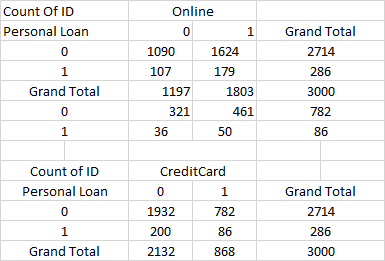

# Compute the following quantities [P(A | B) means “the probability ofA given B”]

i.    P(CC = 1|Loan=1) ( the proportion of credit card holders among the loan acceptors)
      = 86/286 = 0.301
ii.   P(Online = 1|Loan = 1)
      = 179/286= 0.626
iii.  P(Loan = 1)(the proportion of loan acceptors)
      = 286/3000= 0.095
iv.   P(CC = 1|Loan = 0)
      = 782/2714= 0.288
v.    P(Online= 1|Loan=0)
      = 1624/2714 = 0.598
vi.   =P(Loan= 0)
      2714/3000 = 0.905

# Use the quantities computed above to compute the naive Bayes probability P(Loan = 1 | CC=1 , Online = 1) 

=(0.301*0.626*0.095)/[(0.30*0.626*0.095)+(0.288*0.598*0.905)]
= 0.0179/(0.0179+0.156)
= 0.0179/0.1738
= 0.103

# Compare this value with the one obtained from the pivot table in (B). Which is a more accurate estimate?

The value from the crossed pivot table is the more accurate estimate.The value doesnt require or make a simplifying assumption that the probabilities of taking a loan as a CreditCard holder and at the same time an online customers are run independently. That value from the crossed pivot was able to be obtained because of the few variables and few categories added to be considered. Therefore the result is given with plenty of combinations possible to achieve the most accurate estimation

# Which of the entries in this table are needed for computing P(Loan = 1 | CC = 1, Online = 1)? Run naive Bayes on the data. Examine the model output on training data, and find the entry that corresponds to P(Loan = 1 | CC = 1, Online = 1). Compare this to the number you obtained in (E)

P(Loan=1|CC=1, Online=1) can be seen in the detailed scoring for the training data on any line where CreditCard= 1 and Online= 1